In [1]:
#import required packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from matplotlib import pyplot as plt
from sklearn.feature_selection import SelectFromModel

# Load Datasets:

In [2]:
algeria_url = 'https://raw.githubusercontent.com/ebwieman/wildfire-risk-tool/main/Algerian_forest_fires_dataset.csv'
portugal_url = 'https://raw.githubusercontent.com/ebwieman/wildfire-risk-tool/main/forestfires.csv'

algeria_df = pd.read_csv(algeria_url)
portugal_df = pd.read_csv(portugal_url)

## Algeria dataset before cleanup

In [3]:
algeria_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Convert "Classes" column into binary - 0 for no fire, 1 for fire.

Also renamed! now "Classes" is called "Fire" and it is a zero if there was not a fire and a 1 if there was.

In [4]:
algeria_df['Classes'] = algeria_df['Classes'].str.strip()
algeria_df.drop(algeria_df[(algeria_df['Classes'] != 'fire') & (algeria_df['Classes'] != 'not fire')].index, inplace=True)
algeria_df['Classes'].unique()

algeria_df['Classes'].replace(('not fire', 'fire'),(0,1),inplace = True)
algeria_df.rename(columns = {'Classes': 'Fire'},inplace = True)
algeria_df['Fire'].unique()

array([0, 1])

In [5]:
algeria_df = algeria_df.astype(float)
algeria_df = pd.get_dummies(algeria_df)
algeria_df.dropna(axis = 0)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


## Algeria dataset after cleanup

In [6]:
algeria_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
243,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
244,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
245,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


## Portugal dataset

In [7]:
portugal_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


# Split data into test and training dataset

In [8]:
alg_train, alg_test = train_test_split(algeria_df, test_size=0.2, random_state=25)

In [9]:
alg_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire
105,14.0,9.0,2012.0,22.0,76.0,26.0,8.3,47.4,1.1,7.0,0.4,1.6,0.1,0.0
96,5.0,9.0,2012.0,29.0,75.0,16.0,0.0,80.8,3.4,24.0,2.8,5.1,1.7,1.0
91,31.0,8.0,2012.0,28.0,80.0,21.0,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0.0
78,18.0,8.0,2012.0,36.0,54.0,18.0,0.0,89.4,20.0,110.9,9.7,27.5,16.1,1.0
32,3.0,7.0,2012.0,32.0,76.0,20.0,0.7,63.1,2.6,9.2,1.3,3.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1.0,8.0,2012.0,36.0,45.0,14.0,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0.0
146,22.0,6.0,2012.0,33.0,46.0,14.0,1.1,78.3,8.1,8.3,1.9,7.7,1.2,0.0
222,6.0,9.0,2012.0,34.0,71.0,14.0,6.5,64.5,3.3,9.1,1.0,3.5,0.4,0.0
62,2.0,8.0,2012.0,35.0,55.0,12.0,0.4,78.0,5.8,10.0,1.7,5.5,0.8,0.0


In [10]:
y_train_algeria = alg_train["Fire"]
y_test_algeria = alg_test["Fire"]

X_train_algeria = alg_train.drop(["Fire"], axis=1)
X_test_algeria = alg_test.drop(["Fire"], axis=1)

In [11]:
portugal_df = pd.get_dummies(portugal_df)

portugal_train, portugal_test = train_test_split(portugal_df, test_size=0.2, random_state=25)

In [12]:
portugal_df[portugal_df["area"]==0.00]

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2,4,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,1,0,0,0,0,0,0
508,1,2,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,1,0,0,0,0,0,0
511,8,6,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [13]:
portugal_train

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
250,8,5,93.1,157.3,666.7,13.5,26.8,25,3.1,0.0,...,0,0,0,0,0,0,0,0,0,1
48,4,4,87.2,23.9,64.7,4.1,11.8,35,1.8,0.0,...,0,0,0,0,1,0,0,0,0,0
417,6,5,93.4,17.3,28.3,9.9,13.8,24,5.8,0.0,...,0,0,0,0,0,0,0,0,0,1
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,...,0,0,1,0,1,0,0,0,0,0
96,3,4,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,4,4,92.4,96.2,739.4,8.6,19.2,24,4.9,0.0,...,0,0,1,0,0,0,0,1,0,0
143,1,2,90.0,51.3,296.3,8.7,16.6,53,5.4,0.0,...,0,0,0,0,0,1,0,0,0,0
474,4,3,93.0,103.8,316.7,10.8,26.4,35,2.7,0.0,...,0,0,0,0,0,0,0,1,0,0
318,6,5,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0,...,0,0,1,0,0,0,0,1,0,0


In [14]:
y_train_portugal = portugal_train["area"]
y_test_portugal = portugal_test["area"]

X_train_portugal = portugal_train.drop(["area"], axis=1)
X_test_portugal = portugal_test.drop(["area"], axis=1)

# Choosing important features 

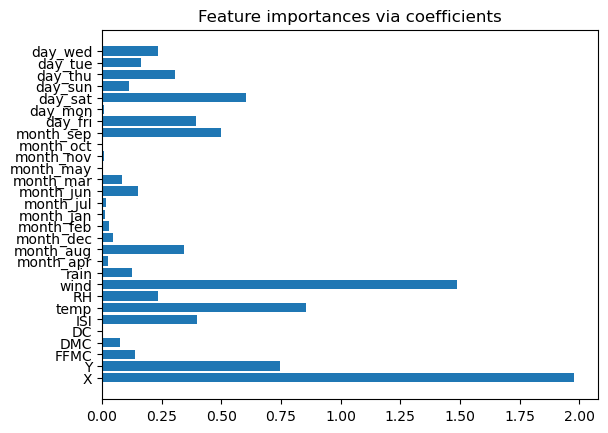

Features selected by SelectFromModel: ['X' 'Y' 'ISI' 'temp' 'wind' 'month_aug' 'month_sep' 'day_fri' 'day_sat'
 'day_thu']


In [15]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train_portugal, y_train_portugal) #Ridge regression with built-in cross-validation.
importance = np.abs(ridge.coef_) # assign importance to each feature through a specific attribute
#The features with the highest absolute coef_ value are considered the most important

#create a plot to visualize the importance of the features
feature_names = np.array(X_train_portugal.columns)
plt.barh(feature_names, importance)
plt.title("Feature importances via coefficients")
plt.show()

#select a certain number of features
threshold = np.sort(importance)[-10]

sfm = SelectFromModel(ridge, threshold=threshold).fit(X_train_portugal, y_train_portugal)
#only select the first three features from the list
selected_features = feature_names[sfm.get_support()][0:10]

print(f"Features selected by SelectFromModel: {selected_features}")

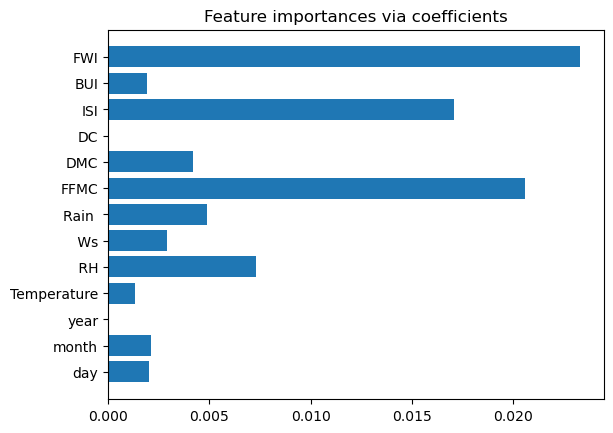

Features selected by SelectFromModel: [' RH' 'Rain ' 'FFMC' 'ISI' 'FWI']


In [16]:
from sklearn.linear_model import RidgeCV
import numpy as np

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train_algeria, y_train_algeria) #Ridge regression with built-in cross-validation.
importance = np.abs(ridge.coef_) # assign importance to each feature through a specific attribute
#The features with the highest absolute coef_ value are considered the most important

#create a plot to visualize the importance of the features
feature_names = np.array(X_train_algeria.columns)
plt.barh(feature_names, importance)
plt.title("Feature importances via coefficients")
plt.show()

#select a certain number of features
threshold = np.sort(importance)[-5]

sfm = SelectFromModel(ridge, threshold=threshold).fit(X_train_algeria, y_train_algeria)
#only select the first three features from the list
selected_features = feature_names[sfm.get_support()][0:5]

print(f"Features selected by SelectFromModel: {selected_features}")

# Training data on different models

## Decision tree model on algeria dataset

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

best_score_DT = 0       #keeping track of highest accuracy
max_depth = 5           #iterator

# train on decision tree classifier
while max_depth != 0:
    DT = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=max_depth))
    DT.fit(X_train_algeria[selected_features], y_train_algeria)
    cv_scores = cross_val_score(DT, X_train_algeria[selected_features], y_train_algeria, cv=5)
    mean_score = cv_scores.mean()
    print(f"Max depth = {max_depth}, score = {mean_score.round(3)}")

    # keeping the list of columns for the max_depth that has the best score 
    if (DT.score(X_train_algeria[selected_features], y_train_algeria) > best_score_DT):
        best_score_DT = DT.score(X_train_algeria[selected_features], y_train_algeria)
        best_DT = DT
        best_max_depth = max_depth
    
    max_depth += -1

Max depth = 5, score = 0.979
Max depth = 4, score = 0.969
Max depth = 3, score = 0.979
Max depth = 2, score = 0.979
Max depth = 1, score = 0.974


## Logistic regression model on algeria dataset

In [18]:
from sklearn.linear_model import LogisticRegression

#  train on logistic regression
LR = LogisticRegression()
LR.fit(X_train_algeria[selected_features], y_train_algeria)

print("Training Accuracy for LR: " + str(LR.score(X_train_algeria[selected_features], y_train_algeria)))

Training Accuracy for LR: 0.9742268041237113
